In [1]:
class TModelPoly:
    def __init__(self, x):
        self.S = 0
        self.X = x
        self.C = [0] * len(x)
        self.V = [[1] * len(x)]

    def Next(self):
        #print self.C
        r = 1
        for i in range(len(self.C)):
            r = r * self.V[self.C[i]][i]

        if self.C[0] == self.S:
            self.S = self.S + 1
            self.V.append([])
            for i in range(len(self.C)):
                self.C[i] = 0
                self.V[self.S].append(self.V[self.S - 1][i] * float(self.X[i]))
            self.C[-1] = self.S
        else:
            if self.C[-1] > 0:
                self.C[-2] = self.C[-2] + 1
                self.C[-1] = self.C[-1] - 1
            else:
                i = -2
                while self.C[i] == 0:
                    i = i - 1
                self.C[i - 1] = self.C[i - 1] + 1
                self.C[-1] = self.C[i] - 1
                self.C[i] = 0
        return r

class TPolyRegression:
    def __init__(self, s):
        self.S = s
        
    def GetPolyArray(self, x):
        pm = TModelPoly(x)
        v = []
        while pm.S <= self.S:
            v.append(pm.Next())
        return v
    
    def GenerateMX(self, x):
        from numpy.linalg import inv
        import numpy as np
        T = []
        for cp in x:
            T.append(self.GetPolyArray(cp))
        T = np.array(T)
        (cols, rows) = T.shape
        if rows > cols:
            raise BaseException("Not enough sample, need at least %d, provided %d" % (rows, cols))
        TT = T.transpose()
        return np.dot(inv(np.dot(TT, T)), TT)

    def NewY(self, MX, y):
        import numpy as np
        self.R = np.dot(MX, np.array(y))

    def Learn(self, x, y):
        import numpy as np
        MX = self.GenerateMX(x)
        self.NewY(MX, y)

    def PrepareX(self,x):
        import numpy as np
        return np.array([self.GetPolyArray(x)])

    def Predict(self, px):
        import numpy as np
        return np.dot(px, self.R)[0]

    def GetValue(self, x):
        return self.Predict(self.PrepareX(x))


In [2]:
m = [(3,0.55),(50,0.501),(100,0.454),(150,0.414),(200,0.382),(250,0.354),(300,0.33),(350,0.308),(400,0.29),(450,0.274)]

3 -0.00028217202715463685
50 0.0008264146580284626
100 -0.0002271799664849139
150 -0.0010307795408656117
200 0.00027096722358782577
250 0.0005334116155762403
300 0.0006119049238010321
350 -0.0006382015630366777
400 -0.0003615565562358758
450 0.0002971912329047255


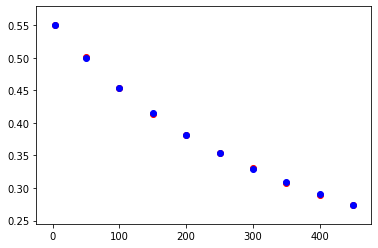

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

lx = []
ly = []
for yk,d in m:
    lx.append([yk])
    ly.append([d])

pr = TPolyRegression(3)
pr.Learn(lx,ly)    
    
x = []
y = []
p = []
for yk,d in m:
    x.append(yk)
    y.append(d)
    yp = pr.GetValue([yk])[0]
    p.append(yp)
    print(yk,d - yp)

plt.scatter(x, y, color="red")
plt.scatter(x, p, color="blue")
plt.show()
